<a href="https://colab.research.google.com/github/Deniszhur1/Projects/blob/main/Data%20Scientist%20Professional%20Certification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My Data Scientist Professional Practical Exam Submission

## 📝 Task List

- Data Validation:   
  - Validation and cleaning steps for every column in the data
- Exploratory Analysis:  
  - Graphics showing single variables only to demonstrate the characteristics of data  
  - Graphic showing two or more variables to represent the relationship between features
  - Description of findings
- Model Development
  - Reasons for selecting the models used, a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Description of the performance of the two models based on an appropriate metric
- Business Metrics
  - Model performance comparison method from the business point of view
  - Model performance using the selected approach
- Final summary, recommendations that the business should undertake



In [ ]:
#Load the data
import pandas as pd
path='recipe_site_traffic_2212.csv'
df = pd.read_csv(path)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data validation
I've checked datatypes, number of missing values in every column and descriptive statistics.
As we can see there are 52 missing values in 4 columns. There are missing values in high_traffic column but it was mentioned in the description.

### Data validation in every column and data cleaning:
1. recipe
checks: numeric - passed (int64 data type), unique - passed (no duplicates).

2. calories;
checks: Numeric - passed (float64 data type), 52 missing values - data cleaning described below;

3. carbohydrate;
checks: Numeric - passed (float64 data type), 52 missing values - data cleaning described below;

4. sugar;
checks: Numeric - passed (float64 data type), 52 missing values - data cleaning described below;

5. protein
checks: Numeric - passed (float64 data type), 52 missing values - data cleaning described below;  

For columns 2-5 with nutritional Information there are many high values that look like not realistic. However they are distributed evenly, so I've applied log transformation for these columns (visualized and explained this process in the explanatory analysis step) and also I would like to double check some extreme values with the team providing the data.

Missing data in columns 2-5:  
I've plotted missing data as the matrix with missingno libary to check are there any dependencies in missing data between categories and also is there any dependance with high traffic.
Matrix shows that missing values are evenly spaced between categories except for the first categories so I've dicided to replace missing values with the median value within the category. Median was chosen because distribution is skewed to the right.  
There is no relation between missing values and high traffic as we can see from the matrix.

6. category
checks: values in provided list - not passed, one category: 'Chicken Breast' is not in the list.  
I've plotted number of recipes for every category to check if there is any inconsistency, bar graph shows that all categories are about the same size.
By now I've treated 'Chicken Breast' category as a mistake and replaced it with the nearest ("parent") category - 'Chicken' - to make data consistent with the description.
But I would like to check with the team providing the data if the category 'Chicken Breast' was added in the data by mistake or why it is not listed in the description.

7. servings
checks: numeric - not passed: field contains both numeric and string values and has "object" data type so cleaning will be required.
All values were cleaned from text (['4 as a snack', '6 as a snack']) and then column data type was converted to numeric.

8. high_traffic
checks: character, "High" or no value - passed. Will be necessary to convert to 1/0 series to use in model.
'High' value was converted to 1 and nan's were converted to 0

In [ ]:

print(df.dtypes)
print(df.isna().sum())
df.describe()

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


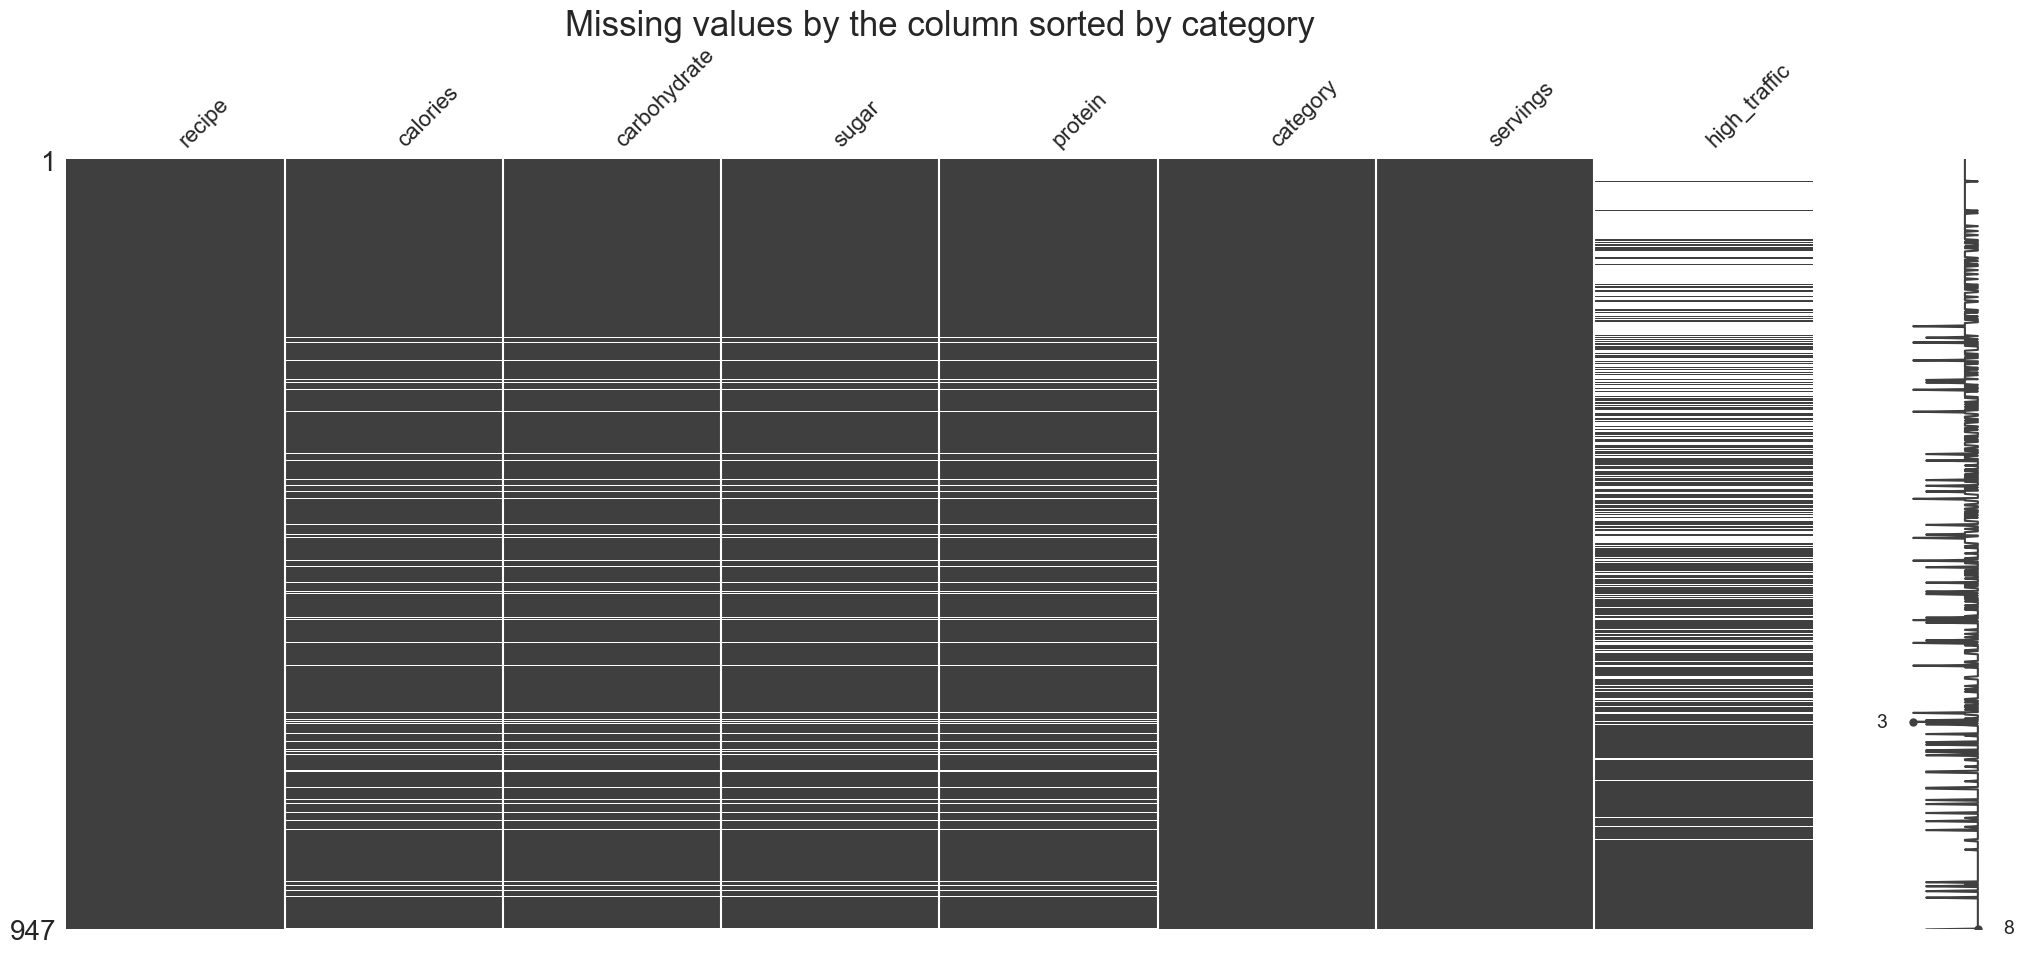

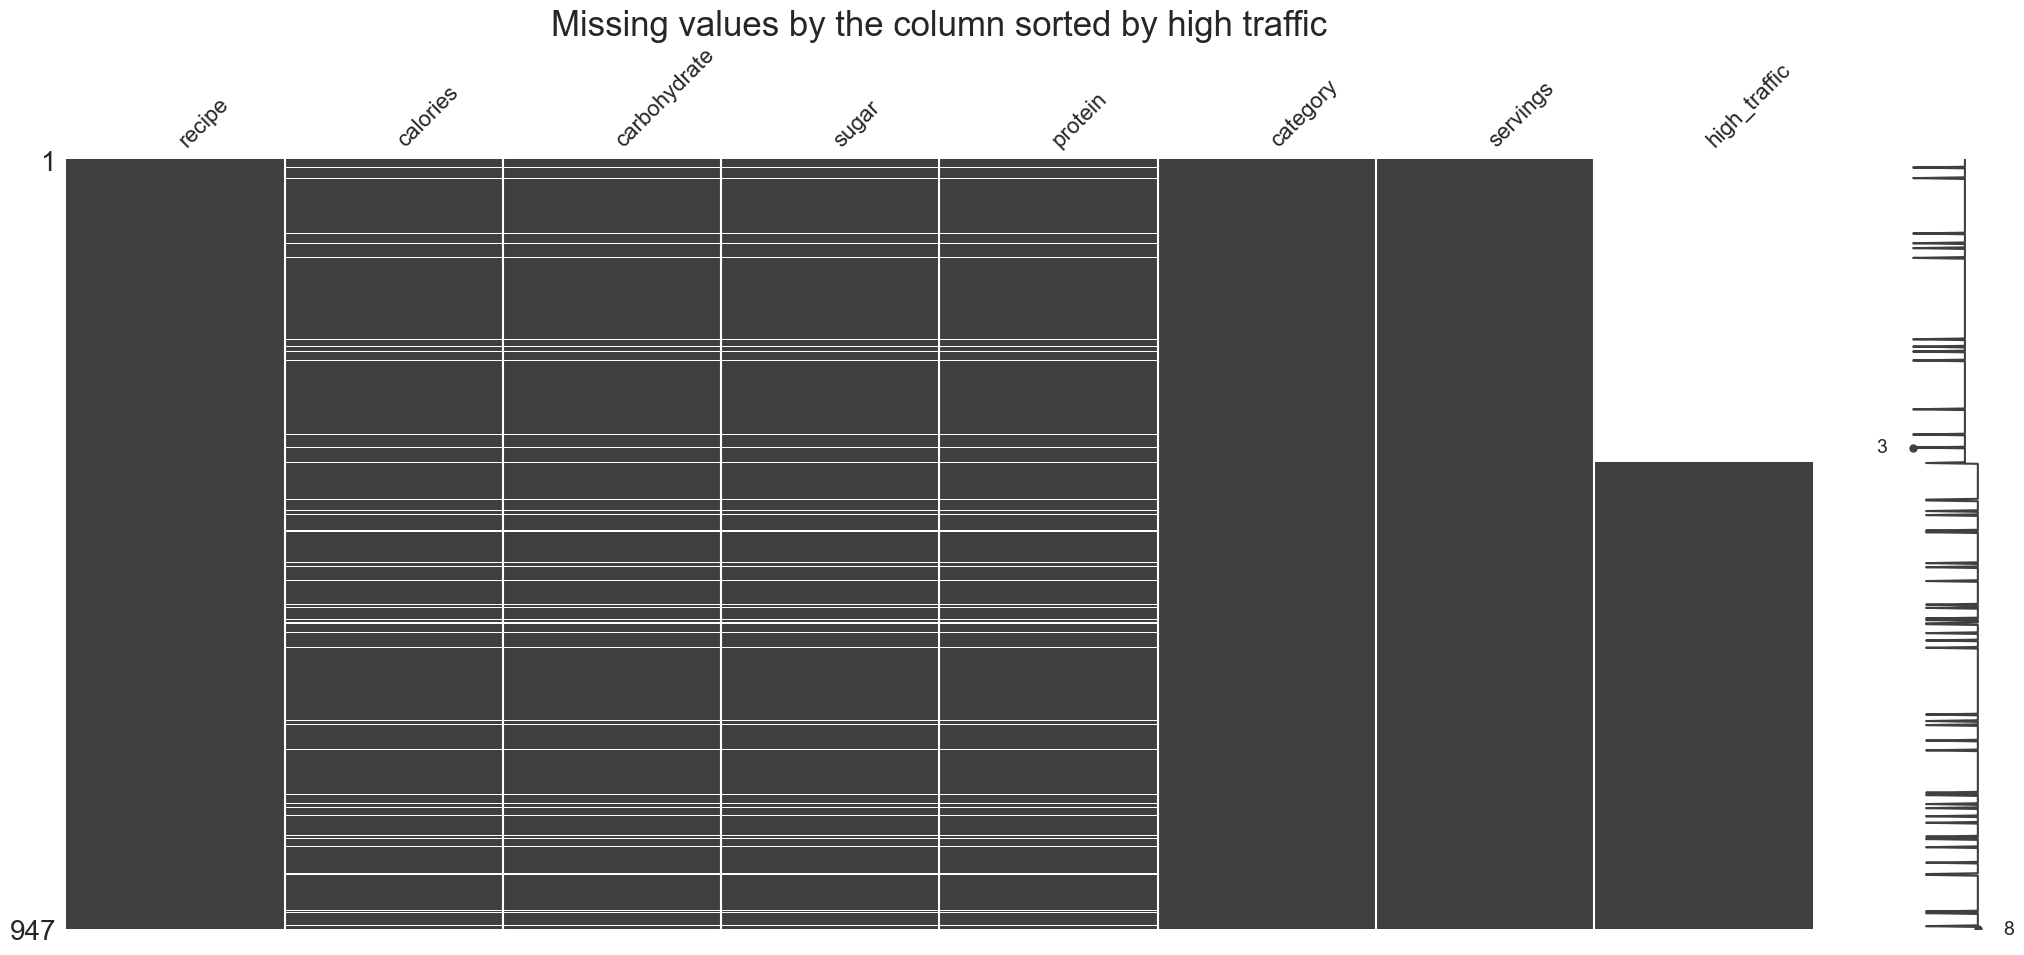

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(df.sort_values('category'))
plt.title('Missing values by the column sorted by category', fontsize = 25)
msno.matrix(df.sort_values('high_traffic', na_position='first'))
plt.title('Missing values by the column sorted by high traffic', fontsize = 25)
plt.show()

In [ ]:
dup_recipe = df['recipe'].duplicated()
print('duplicated recipes found:')
print(len(df[dup_recipe]))

duplicated recipes found:
0


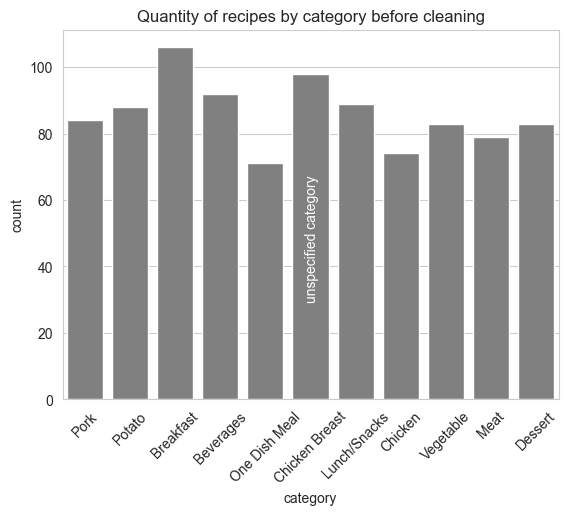

In [ ]:
import seaborn as sns

fig, ax = plt.subplots()
sns.countplot(x=df['category'], color='grey', ax=ax).set(title='Quantity of recipes by category before cleaning')
ax.text(x=4.87,y= 30, s='unspecified category', rotation=90, color='white')
plt.xticks(rotation=45)
plt.show()

In [ ]:
categories_data = df['category'].unique()
print(categories_data)
categories_check = {'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', 'One Dish Meal'}
diff_not_in_check = set(categories_data).difference(categories_check)
diff_not_in_data = categories_check.difference(set(categories_data))
print('categories from dataset not listed in the description:', diff_not_in_check)
print('categories from description not listed in the dataset:', diff_not_in_data)
df['category'].replace('Chicken Breast', 'Chicken', inplace=True)
#to check there is no 'Chicken breast' now
df['category'].unique()

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']
categories from dataset not listed in the description: {'Chicken Breast'}
categories from description not listed in the dataset: set()


array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert'],
      dtype=object)

In [ ]:
df['servings_cleaned'] = df['servings'].str.replace(r'[A-Za-z\s]', '').astype('uint8')
print('unique values and datatypes before conversion:')
print(df['servings'].unique())
print(df['servings'].dtypes)
print('unique values and datatypes after conversion:')
print(df['servings_cleaned'].unique())
print(df['servings_cleaned'].dtypes)

unique values and datatypes before conversion:
['6' '4' '1' '2' '4 as a snack' '6 as a snack']
object
unique values and datatypes after conversion:
[6 4 1 2]
uint8


In [ ]:
pd.set_option('display.width', None)
pd.set_option('max_colwidth', 800)

grouped = df[df['calories'].isna()!=True].groupby('category')

df_reindex = df.set_index('category')

df_before = df[['category', 'calories', 'carbohydrate', 'sugar', 'protein']].groupby('category').median()

for col in ['calories', 'carbohydrate', 'sugar', 'protein']:
    avg_vals = pd.Series(grouped[col].median())
    df_reindex[col].fillna(value=avg_vals, inplace=True)

df_filled = df_reindex.reset_index()

print('\nassert that mean values within category is unchanged:')
df_after = df_filled[['category', 'calories', 'carbohydrate', 'sugar', 'protein']].groupby('category').median()
try:
    pd.testing.assert_frame_equal(df_before, df_after)

except:
    print('Test failed')
else:
    print('Test passed')


assert that mean values within category is unchanged:
Test passed


In [ ]:
print('unique values in high_traffic field before cleaning:')
print(df['high_traffic'].unique())
df_filled['high_traffic'] = df_filled['high_traffic'].replace('High', 1).fillna(0).astype('uint8')
print('unique values in high_traffic field after cleaning:')
print(df_filled['high_traffic'].unique())
print('\nNAn\'s after cleaning\n', df_filled.isna().sum())
print(df_filled.dtypes)

unique values in high_traffic field before cleaning:
['High' nan]
unique values in high_traffic field after cleaning:
[1 0]

NAn's after cleaning
 category            0
recipe              0
calories            0
carbohydrate        0
sugar               0
protein             0
servings            0
high_traffic        0
servings_cleaned    0
dtype: int64
category             object
recipe                int64
calories            float64
carbohydrate        float64
sugar               float64
protein             float64
servings             object
high_traffic          uint8
servings_cleaned      uint8
dtype: object


# Exploratory analysis
Distribution of values in ['calories', 'carbohydrate', 'sugar', 'protein'] fields shows that distribution is left-skewed so log transformation would be necessary to make distributions closer to normal distributions

Before model development I've decided to check relation between target variable and other variables.
From the heatmap we can see from little to no correlation between logaritm of numeric variables and target variable.
From the stacked bar chart we can see that high traffic of the recipe strongly depends on category of the meal, so it will be necessary to include this variable in models

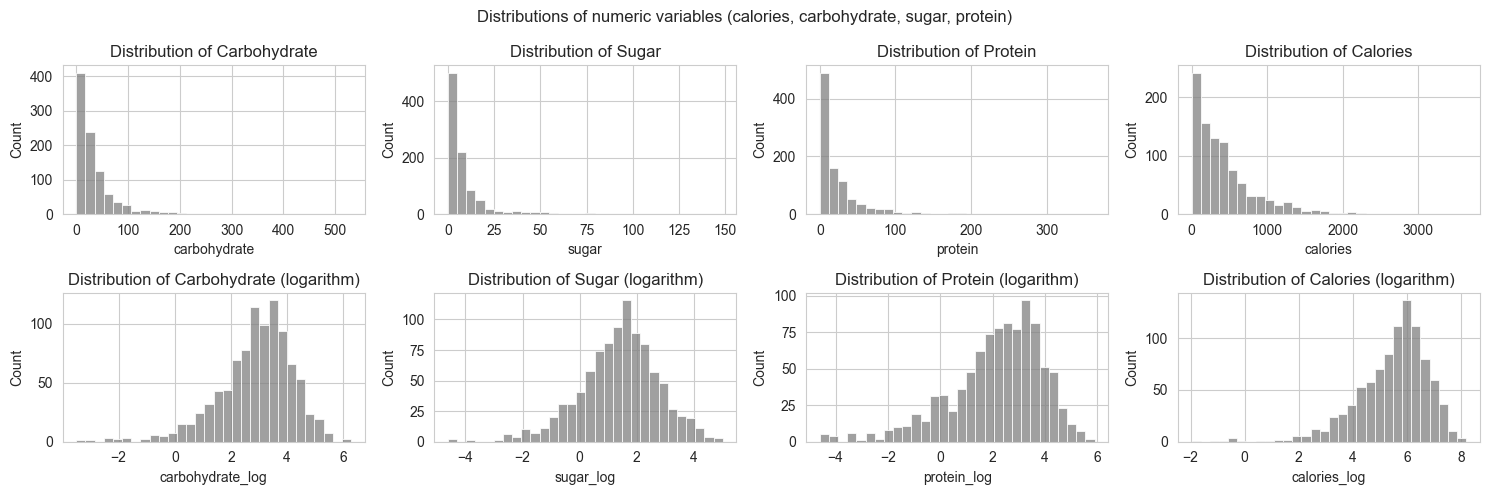

In [ ]:
import numpy as np
fig, axes = plt.subplots(2,4,figsize=(15,5))
#small cleaning step to transform 2 zero values in protein 'column' to very small value in order to perform log transformation
df_filled.loc[df_filled['protein']==0, 'protein'] = 0.01

for i, col_name in enumerate(['calories', 'carbohydrate', 'sugar', 'protein']):
    sns.histplot(data=df_filled, x=col_name, ax=axes[0,i-1], color='gray', bins=30).set(title=f'Distribution of {str.capitalize(col_name)}')

    df_filled[col_name+'_log'] = np.log(df_filled[col_name])
    sns.histplot(data=df_filled, x=col_name+'_log', ax=axes[1, i-1], color='gray', bins=30).set(title=f'Distribution of {str.capitalize(col_name)} (logarithm)')
fig.suptitle('Distributions of numeric variables (calories, carbohydrate, sugar, protein)')
fig.tight_layout()
plt.show()

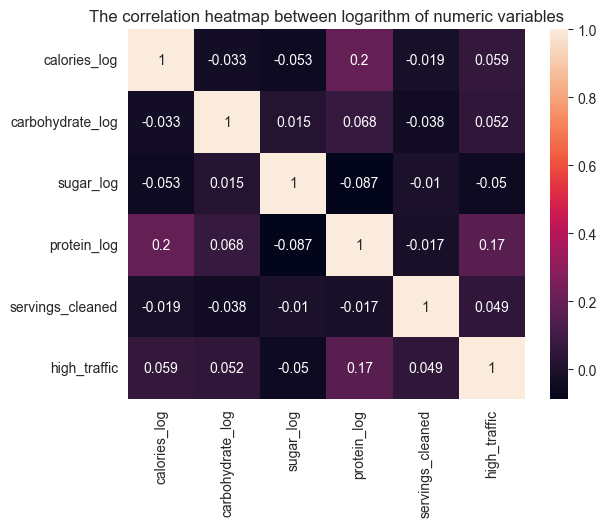

In [ ]:
num_cols = ['calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log', 'servings_cleaned', 'high_traffic']
sns.heatmap(df_filled[num_cols].corr(),annot=True).set(title='The correlation heatmap between logarithm of numeric variables')
plt.yticks(rotation=0)
plt.show()

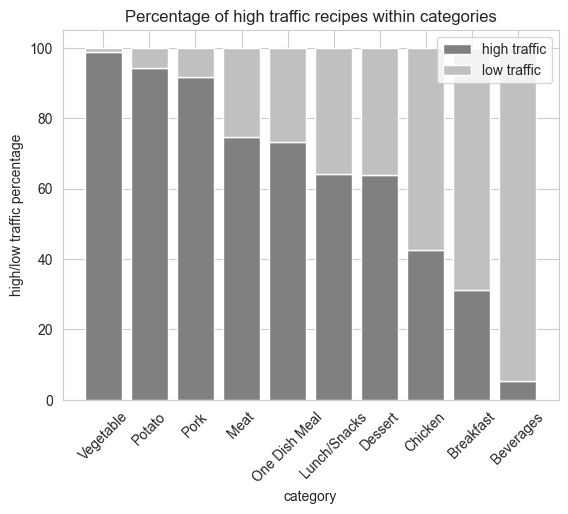

In [ ]:
df_filled['low_traffic'] = df_filled['high_traffic'].apply(lambda x: 1 if x==0 else 0)
groupby_cat = df_filled[['category', 'high_traffic', 'low_traffic']].groupby('category').agg(['sum', 'count'])
groupby_cat['high_traffic_rel'] = (groupby_cat['high_traffic']['sum'] / groupby_cat['high_traffic']['count'])*100
groupby_cat['low_traffic_rel'] = (groupby_cat['low_traffic']['sum'] / groupby_cat['low_traffic']['count'])*100
groupby_cat.sort_values('high_traffic_rel', ascending=False, inplace=True)
fig, ax = plt.subplots()
ax.bar(groupby_cat.index, groupby_cat['high_traffic_rel'], label='high traffic', color='gray')
ax.bar(groupby_cat.index, groupby_cat['low_traffic_rel'], label='low traffic',  color='silver', bottom=groupby_cat['high_traffic_rel'])
ax.set_xticklabels(groupby_cat.index, rotation=45)
ax.set_ylabel('high/low traffic percentage')
ax.set_xlabel('category')
ax.set_title('Percentage of high traffic recipes within categories')
ax.legend()
plt.show()

## Model development
target variable is binary so there is binary classification type of problem.  
The baseline model I am chosing logistic regression because it is basic model for such type of problem, it is simple to fit and to interpret.
The comparison model I am chosing random forest classifier because it is compatible for the problem but uses different algorythm  which can be more effective than regression in some cases, and also it is more powerful than single Decision tree.  
For model comparison I've  decided to use area under the Receiver Operating Characteristic Curve (ROC AUC) score because it is shows the performance of a classification models at all classification thresholds.

In [ ]:
#prepare data for using in machine learning algorithms
df_model = df_filled[['calories_log', 'carbohydrate_log', 'sugar_log', 'protein_log', 'servings_cleaned', 'category', 'high_traffic']]
#I want to check all categories coefficients so I do not drop any of the dummies
df_model = pd.get_dummies(df_model)
print(df_model.info())
display(df_model.head())
len(df_model.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories_log            947 non-null    float64
 1   carbohydrate_log        947 non-null    float64
 2   sugar_log               947 non-null    float64
 3   protein_log             947 non-null    float64
 4   servings_cleaned        947 non-null    uint8  
 5   high_traffic            947 non-null    uint8  
 6   category_Beverages      947 non-null    uint8  
 7   category_Breakfast      947 non-null    uint8  
 8   category_Chicken        947 non-null    uint8  
 9   category_Dessert        947 non-null    uint8  
 10  category_Lunch/Snacks   947 non-null    uint8  
 11  category_Meat           947 non-null    uint8  
 12  category_One Dish Meal  947 non-null    uint8  
 13  category_Pork           947 non-null    uint8  
 14  category_Potato         947 non-null    ui

,calories_log,carbohydrate_log,sugar_log,protein_log,servings_cleaned,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,5.989613,2.973487,1.654411,3.395179,6,1,0,0,0,0,0,0,0,1,0,0
1,3.568969,3.652215,-0.415515,-0.083382,4,1,0,0,0,0,0,0,0,0,1,0
2,6.818137,3.753730,1.128171,1.057790,1,0,0,1,0,0,0,0,0,0,0,0
3,4.575020,3.419692,3.654029,-3.912023,4,1,1,0,0,0,0,0,0,0,0,0
4,3.297687,0.615186,-0.223144,-0.634878,4,0,1,0,0,0,0,0,0,0,0,0


16

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

results=[]
scaler = StandardScaler()

X = df_model.drop('high_traffic', axis=1).values
y = df_model['high_traffic'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kf = KFold(n_splits=20, shuffle=True, random_state=23)

logit = LogisticRegression()

logit_cv_acc = cross_val_score(logit, X_train_scaled, y_train, cv=kf, scoring="roc_auc")

results.append(logit_cv_acc)
print(logit_cv_acc)

[0.83035714 0.78151261 0.83055556 0.76488095 0.78611111 0.83908046
 0.84347826 0.80208333 0.88919668 0.72753623 0.77777778 0.8989899
 0.82386364 0.79551821 0.83933518 0.86944444 0.89750693 0.82748538
 0.94396552 0.86111111]


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.01, max_depth=10, random_state=23)
rf_cv_roc = cross_val_score(rf, X_train_scaled, y_train, cv=kf, scoring="roc_auc")
results.append(rf_cv_roc)

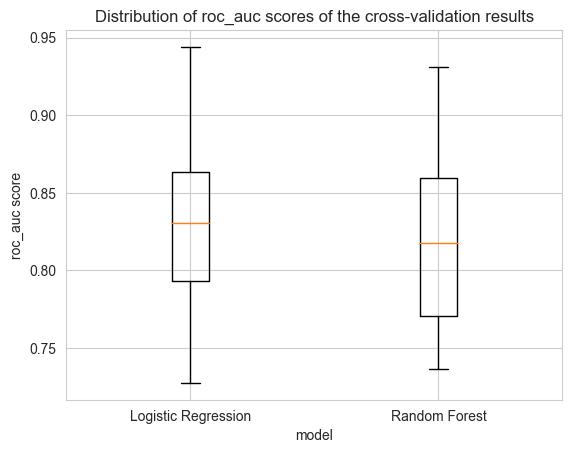

In [ ]:
models=['Logistic Regression', 'Random Forest']
sns.set_style('whitegrid')
plt.boxplot(results, labels=models)
plt.title('Distribution of roc_auc scores of the cross-validation results')
plt.ylabel('roc_auc score')
plt.xlabel('model')
plt.show()

In [ ]:
logit.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

y_pred_logit = logit.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

score_logit = roc_auc_score(y_test, y_pred_logit)
score_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Test set Area Under the ROC for Logistic regression: {score_logit}')
print(f'Test set Area Under the ROC for Randomforest classifier: {score_rf}')

Test set Area Under the ROC for Logistic regression: 0.7147907401071958
Test set Area Under the ROC for Randomforest classifier: 0.6866803512373133


## Model evaluation
Results of the cross-validation show us that the best ROC AUC score was achieved by the logistic regression model.
Then I tune hyperparameters of the both models to check if the performance of tuned models is able to increase.  
As the result we see that logistic regression with tuned parameters shows better ROC AUC score which means that the quality of Logistic regression model's predictions is better than Random forest model's predictions regardless of the chosen threshold.

Then I check best logistic regression model's coefficients by plotting them on the bar graph.
We can see that findings from the exporatory data analysis confirmed by the model: the most significant coefficient is "Vegetable" from the category field, followed by other categories such as "Potato" and "Pork" which means that recipes from these categories have the highest chance to produce high traffic.
There are zero ore close to zero coefficients for the calories, carbohydrate, sugar, protein which means that there is from little to no relation between the numeric characteristics of the recipe (calories, carbohydrate, sugar, protein) and high traffic.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline
pipe_logit = Pipeline([('classifier' , LogisticRegression())])

# Create param grid
param_grid_logit = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2', 'None'],
    'classifier__C' : [0.01, 0.1, 1, 2, 5],
    'classifier__solver' : ['liblinear']}
]

# Create grid search object
clf_logit = GridSearchCV(pipe_logit, param_grid = param_grid_logit, cv = kf, verbose=True, n_jobs=-1, scoring='roc_auc')

best_clf_logit = clf_logit.fit(X_train_scaled, y_train)
print(best_clf_logit.best_params_, best_clf_logit.best_score_, best_clf_logit.best_estimator_)

y_pred_gr_logit = clf_logit.predict(X_test_scaled)
score_gr_logit = roc_auc_score(y_test, y_pred_gr_logit)
acc_score_gr_logit = accuracy_score(y_test, y_pred_gr_logit)
print(f'Test set Area Under the ROC score for Grid Search (logistic regression): {score_gr_logit}')
print(f'Test set accuracy score for Grid Search (logistic regression): {acc_score_gr_logit}')

Fitting 20 folds for each of 15 candidates, totalling 300 fits
{'classifier': LogisticRegression(C=0.1, penalty='l1', solver='liblinear'), 'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'} 0.8374715722902983 Pipeline(steps=[('classifier',
                 LogisticRegression(C=0.1, penalty='l1', solver='liblinear'))])
Test set Area Under the ROC score for Grid Search (logistic regression): 0.727448967955297
Test set accuracy score for Grid Search (logistic regression): 0.7263157894736842


In [ ]:
pipe_rf = Pipeline([('classifier' , RandomForestClassifier())])

param_grid_rf = [
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : [400],
     'classifier__max_depth' : [4, 10],
     'classifier__min_samples_leaf': [0.01, 0.1, 0.2],
    'classifier__max_features' : ['log2', 'sqrt', 'None']
    }
]
# Create grid search object
clf_rf = GridSearchCV(pipe_rf, param_grid = param_grid_rf, cv = kf, verbose=True, n_jobs=-1, scoring='roc_auc')

best_clf_rf = clf_rf.fit(X_train_scaled, y_train)
print(best_clf_rf.best_params_, best_clf_rf.best_score_, best_clf_rf.best_estimator_)

y_pred_gr_rf = clf_rf.predict(X_test_scaled)
score_gr_rf = roc_auc_score(y_test, y_pred_gr_rf)
acc_score_gr_rf = accuracy_score(y_test, y_pred_gr_rf)
print(f'Test set Area Under the ROC score for Grid Search (random forest): {score_gr_rf}')
print(f'Test set accuracy score score for Grid Search (random forest): {acc_score_gr_rf}')

Fitting 20 folds for each of 18 candidates, totalling 360 fits
{'classifier': RandomForestClassifier(max_depth=4, max_features='log2', min_samples_leaf=0.01,
                       n_estimators=400), 'classifier__max_depth': 4, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 0.01, 'classifier__n_estimators': 400} 0.8244197425119963 Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=4, max_features='log2',
                                        min_samples_leaf=0.01,
                                        n_estimators=400))])
Test set Area Under the ROC score for Grid Search (random forest): 0.6403238681719694
Test set accuracy score score for Grid Search (random forest): 0.6842105263157895


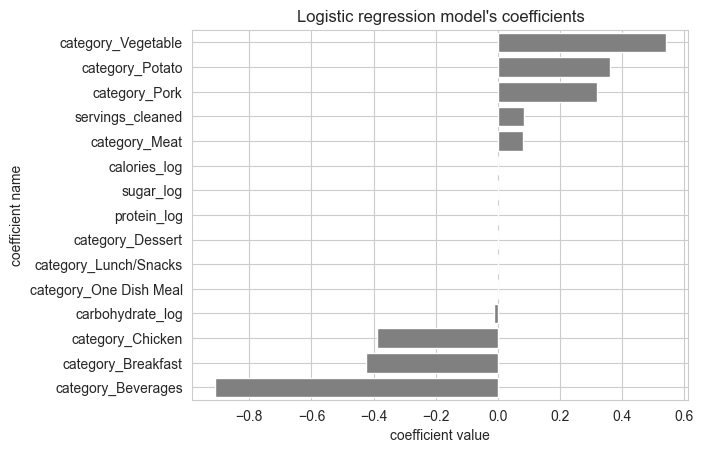

In [ ]:
fig, ax = plt.subplots()
coefs = best_clf_logit.best_estimator_.named_steps['classifier'].coef_[0]
coefs_series = pd.Series(coefs, index=df_model.drop('high_traffic', axis=1).columns)
sns.barplot(x=coefs_series.sort_values(ascending=False), y=coefs_series.sort_values(ascending=False).index, label="Total", color="gray", orient='h').set(title='Logistic regression model\'s coefficients', xlabel='coefficient value', ylabel='coefficient name')
plt.grid(axis='y')
plt.show()

# Business metrics  
Logistic regression model  with the best parameters found and default threshold of 50% is able to correctly predict if a recipe shows high traffic or not in around 72% of cases which is less than rate of 80% desired by business.
However if we dive into the business goal ("predict which recipes will be popular 80% of the time" and "minimize the
chance of showing unpopular recipes") we can see that business is more interested in predicting recipes which lead to high traffic (True positive labels) and minimizing predictions of high traffic labels for unpopular recipes (false positive label) than predicting all recipes which will not lead to high traffic - this could be measured by the Precision score.
We can use these conclusions to define business metrics for the model: find threshold of the model to achieve at least 80% precision score and then compare overall accuracy of the models using the found threshold.
This process is shown on the graph below for the best Logistic regression model and for the best Random Forest model.

Results shows that both models perform closely with slightly greater accuracy of the Random Forest classifier model (73% against 68% accuracy with the threshold of 60% and 66% accordingly). This means that with the found threshold of 60% our Random Forest classifier model is able not to mistakenly label unpopular recipe as high traffic recipe in 80% of cases and make correct predictions in 73% of cases. False negative errors - when model do not predict high traffic but actually recipe shows it - are less painful for the business than showing unpopular recipe.


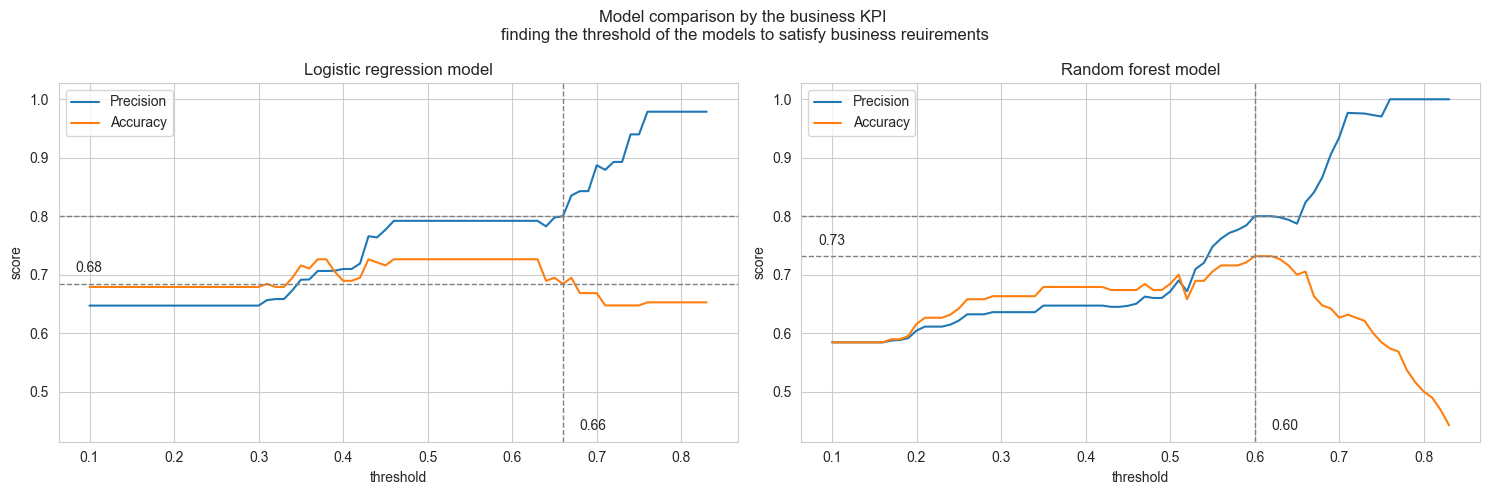

In [ ]:
from collections import defaultdict
from sklearn.metrics import precision_score

y_pred_gr_pr_logit = clf_logit.predict_proba(X_test_scaled)
y_pred_gr_pr_rf = clf_rf.predict_proba(X_test_scaled)

df_test = pd.DataFrame({'predicted_logit': y_pred_gr_pr_logit[:, 1], 'predicted_rf': y_pred_gr_pr_rf[:, 1], 'true': y_test})

d_kpi = defaultdict(list)

t_min_logit = -1
t_min_rf = -1

for t in np.arange(0.1, 0.84, 0.01):
    df_test['pred_logit_lbl']= df_test['predicted_logit'].apply(lambda x: 1 if x >= t else 0)
    cf = confusion_matrix(y_test, df_test['pred_logit_lbl'])

    d_kpi['precision_logit'].append(precision_score(y_test, df_test['pred_logit_lbl']))
    if (cf[1][1]/ (cf[1][1] + cf[0][1])) >= 0.8 and t_min_logit == -1:
        t_min_logit = t
        acc_t_min_logit = (cf[1][1] + cf[0][0]) / cf.sum()
    d_kpi['err_logit'].append(cf[0][1]/ (cf.sum()))
    d_kpi['accuracy_logit'].append((cf[1][1] + cf[0][0]) / (cf.sum()))
    d_kpi['threshold_logit'].append(t)

    df_test['pred_rf_lbl']= df_test['predicted_rf'].apply(lambda x: 1 if x >= t else 0)
    cf = confusion_matrix(y_test, df_test['pred_rf_lbl'])
    d_kpi['precision_rf'].append(precision_score(y_test, df_test['pred_rf_lbl']))
    if (cf[1][1]/ (cf[1][1] + cf[0][1])) >= 0.8 and t_min_rf == -1:
        t_min_rf = t
        acc_t_min_rf = (cf[1][1] + cf[0][0]) / cf.sum()
    d_kpi['err_rf'].append(cf[0][1]/ (cf.sum()))
    d_kpi['accuracy_rf'].append((cf[1][1] + cf[0][0]) / (cf.sum()))
    d_kpi['threshold_rf'].append(t)


fig, axes = plt.subplots(1,2,figsize=(15,5))

lw = 1
sns.set_style("whitegrid")
sns.lineplot(x=d_kpi['threshold_logit'], y=d_kpi['precision_logit'], label='Precision', ax=axes[0])
sns.lineplot(x=d_kpi['threshold_logit'], y=d_kpi['accuracy_logit'], label='Accuracy', ax=axes[0])
axes[0].axhline(y=0.8, color='gray',  linestyle='--', linewidth=lw)
axes[0].axhline(y=acc_t_min_logit, color='gray',  linestyle='--', linewidth=lw)
axes[0].axvline(x=t_min_logit, color='gray',  linestyle='--', linewidth=lw)
axes[0].set_title('Logistic regression model')

sns.set_style("whitegrid")
sns.lineplot(x=d_kpi['threshold_rf'], y=d_kpi['precision_rf'], label='Precision', ax=axes[1])
sns.lineplot(x=d_kpi['threshold_rf'], y=d_kpi['accuracy_rf'], label='Accuracy', ax=axes[1])
axes[1].axhline(y=0.8, color='gray', linestyle='--', linewidth=lw)
axes[1].axhline(y=acc_t_min_rf, color='gray', linestyle='--', linewidth=lw)
axes[1].axvline(x=t_min_rf, color='gray',  linestyle='--', linewidth=lw)
axes[1].text(t_min_rf+0.02, axes[1].get_ylim()[0]+0.02, "%.2f" % t_min_rf)
axes[0].text(t_min_logit+0.02, axes[1].get_ylim()[0]+0.02, "%.2f" % t_min_logit)
axes[1].text(axes[1].get_xlim()[0]+0.02, acc_t_min_rf+0.02, "%.2f" % acc_t_min_rf)
axes[0].text(axes[1].get_xlim()[0]+0.02, acc_t_min_logit+0.02,  "%.2f" % acc_t_min_logit)
axes[1].set_title('Random forest model')
axes[1].set_ylabel('score')
axes[0].set_ylabel('score')
axes[1].set_xlabel('threshold')
axes[0].set_xlabel('threshold')
axes[0].sharex(axes[1])
axes[0].sharey(axes[1])

fig.suptitle('Model comparison by the business KPI \nfinding the threshold of the models to satisfy business reuirements')
fig.tight_layout()

plt.legend()
plt.show()

# Summary and recommendations
The developed Random Forest classifier model can be used in production to help product manager decide which recipes to display on the main page to gain more traffic on the site and which recipes should not be displayed.  

Moreover the conducted research gave meaningful insights: most popular recipes which led to high traffic on the site mostly refer to vegetables and potato categories and slightly less popular were meat and pork categories. On the other hand chicken meals, breakfasts and beverages were the least popular recipe categories. This information can be used to make product managers more focused on categories of recipes which leads to high traffic and avoid recipes from unpopular categories: for example more often show vegetable recipes and focus on improvement of the categories which leads to high traffic. Further reserach of the target audience (it could be vegeterians) may be performed to develop more specific recipes.  

To improve model It would be useful to collect more data from the web site and also include more features, for example time to make the meal, ingridients, cost per serving - to further improve the model and to figure out which details of the recipe make it more popular on this web site.